In [11]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from adjustText import adjust_text
import os

In [12]:
os.chdir("/home/ledum/data/LshCas13a_RNA_cleavage/LshCas13a_5_min")

In [13]:
LRTable = pd.read_csv("Results/Tables/TCS_detection_tables/LRTest_table_and_genome_features.tsv", sep="\t")

#LRTable.loc[LRTable["MatchedFeatureType"].isin(["CDS", "tRNA"]) == False, "MatchedFeatureType"] = "other"

ylim=(0, max(-np.log10(LRTable["PValue.adj"].tolist()))*1.05)

tRNA
CDS


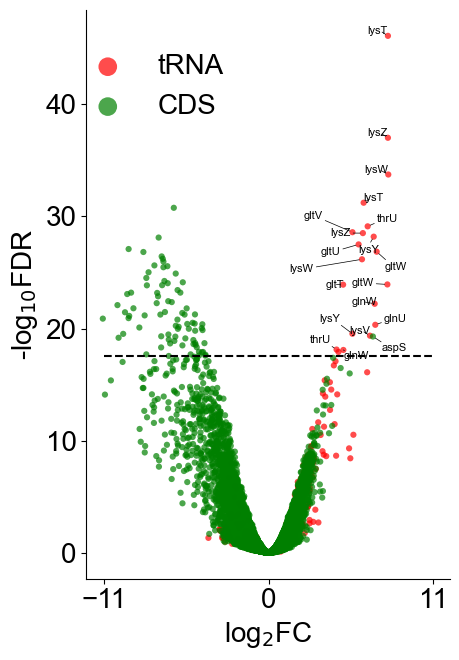

In [14]:
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 20
figure = plt.figure(figsize=(5,7))

LRT_volcano = figure.add_subplot()

colors_dict = {"tRNA" : "red", "CDS" : "green"}
dots_size=20
transparency=0.7

top_N_cutoff = 100

#features_list = set(WT_LRTable["MatchedFeatureType"].tolist()+LRTable["MatchedFeatureType"].tolist())

for feature in colors_dict.keys():
    print(feature)
    current_color = colors_dict[feature]
    
    LRT_volcano.scatter(x=LRTable[LRTable.MatchedFeatureType == feature]["logFC"].tolist(),
                           y=-np.log10(LRTable[LRTable.MatchedFeatureType == feature]["PValue.adj"].tolist()),
                           s=dots_size,
                           label=feature,
                           facecolors='none', 
                           edgecolors='none',
                           alpha=transparency,
                           c = current_color)

SelectedFeatures = LRTable.query("logFC > 0")[0:20]
SelectedFeatureLabels = []

for x, y, t in zip(SelectedFeatures["logFC"], 
                   -np.log10(SelectedFeatures["PValue.adj"]), 
                   SelectedFeatures["MatchedFeatureGene"]):
    SelectedFeatureLabels.append(LRT_volcano.text(x, y, t, size=8))

adjust_text(SelectedFeatureLabels, force_points=0.1, force_text=0.1,
            expand_points=(1, 1), expand_text=(1.6, 1.6),
            arrowprops=dict(arrowstyle="-", color='black', lw=0.5))

LRT_volcano.set_xlabel("log$_2$FC")
LRT_volcano.set_ylabel("-log$_{10}$FDR")
#LRT_volcano.set_title("A", size=15, weight='bold', loc='left')

LRT_volcano.spines['top'].set_visible(False)
LRT_volcano.spines['right'].set_visible(False)

hline_y = -np.log10(LRTable.loc[top_N_cutoff-1]["PValue.adj"])
min_x = -round(max(abs(LRTable["logFC"])))
max_x = round(max(abs(LRTable["logFC"])))
LRT_volcano.hlines(y = hline_y, xmin=min_x, xmax=max_x, colors="black", linestyles="dashed", lw=1.5)
LRT_volcano.xaxis.set_ticks([min_x, 0, max_x])


handles, labels = LRT_volcano.get_legend_handles_labels()
figure.legend(handles, labels, 
              loc="upper left", bbox_to_anchor=(0.15,0.93), frameon=False, markerscale=3)

figure.tight_layout()
figure.align_labels()

figure.savefig("Results/Pictures/EcC3000_5_min_after_induction_volcano_plot.png", 
               bbox_inches='tight',
               dpi=300)

tRNA
CDS


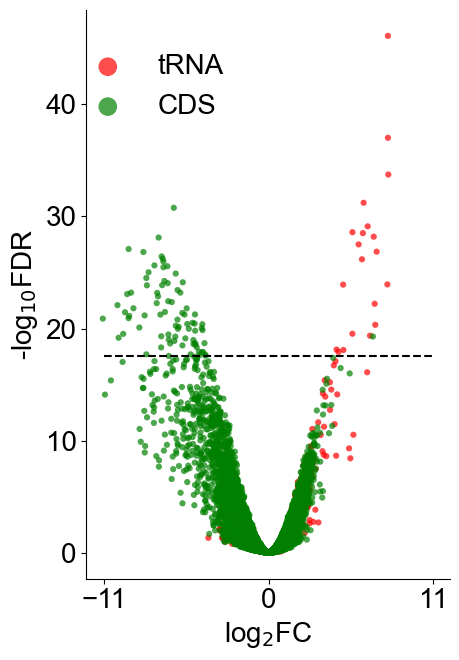

In [15]:
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 20
figure = plt.figure(figsize=(5,7))

LRT_volcano = figure.add_subplot()

colors_dict = {"tRNA" : "red", "CDS" : "green"}
dots_size=20
transparency=0.7

top_N_cutoff = 100

#features_list = set(WT_LRTable["MatchedFeatureType"].tolist()+LRTable["MatchedFeatureType"].tolist())

for feature in colors_dict.keys():
    print(feature)
    current_color = colors_dict[feature]
    
    LRT_volcano.scatter(x=LRTable[LRTable.MatchedFeatureType == feature]["logFC"].tolist(),
                           y=-np.log10(LRTable[LRTable.MatchedFeatureType == feature]["PValue.adj"].tolist()),
                           s=dots_size,
                           label=feature,
                           facecolors='none', 
                           edgecolors='none',
                           alpha=transparency,
                           c = current_color)

# SelectedFeatures = LRTable.query("logFC > 0")[0:20]
# SelectedFeatureLabels = []

# for x, y, t in zip(SelectedFeatures["logFC"], 
#                    -np.log10(SelectedFeatures["PValue.adj"]), 
#                    SelectedFeatures["MatchedFeatureGene"]):
#     SelectedFeatureLabels.append(LRT_volcano.text(x, y, t, size=8))

# adjust_text(SelectedFeatureLabels, force_points=0.1, force_text=0.1,
#             expand_points=(1, 1), expand_text=(1.6, 1.6),
#             arrowprops=dict(arrowstyle="-", color='black', lw=0.5))

LRT_volcano.set_xlabel("log$_2$FC")
LRT_volcano.set_ylabel("-log$_{10}$FDR")
#LRT_volcano.set_title("A", size=15, weight='bold', loc='left')

LRT_volcano.spines['top'].set_visible(False)
LRT_volcano.spines['right'].set_visible(False)

hline_y = -np.log10(LRTable.loc[top_N_cutoff-1]["PValue.adj"])
min_x = -round(max(abs(LRTable["logFC"])))
max_x = round(max(abs(LRTable["logFC"])))
LRT_volcano.hlines(y = hline_y, xmin=min_x, xmax=max_x, colors="black", linestyles="dashed", lw=1.5)
LRT_volcano.xaxis.set_ticks([min_x, 0, max_x])


handles, labels = LRT_volcano.get_legend_handles_labels()
figure.legend(handles, labels, 
              loc="upper left", bbox_to_anchor=(0.15,0.93), frameon=False, markerscale=3)

figure.tight_layout()
figure.align_labels()

figure.savefig("Results/Pictures/EcC3000_5_min_after_induction_volcano_plot_without_labels.png", 
               bbox_inches='tight',
               dpi=300)

In [18]:
#downreg_genes = ["glpK", "glpQ", "yhjX", "treB"]
downreg_genes = ["yhjX"]
LRTable.loc[LRTable["MatchedFeatureGene"].isin(downreg_genes) == True, "label"] = "downregulated genes"
LRTable.loc[LRTable["MatchedFeatureGene"].isin(downreg_genes) == False, "label"] = "other"
LRTable

,SeqID,Pos,Strand,logFC,logCPM,LR,PValue,PValue.adj,MatchedFeatureType,MatchedFeatureID,MatchedFeatureGene,MatchedFeatureDescription,MatchedFeatureStart,MatchedFeatureEnd,MatchedFeatureStrand,label
0,NC_000913.3,780588,+,7.957713,7.199391,2.288226e+02,1.076734e-51,7.785968e-47,tRNA,rna23,lysT,tRNA-Lys,780554,780629,+,other
1,NC_000913.3,781403,+,7.957279,6.683054,1.857804e+02,2.651163e-42,9.585411e-38,tRNA,rna28,lysZ,tRNA-Lys,781369,781444,+,other
2,NC_000913.3,780877,+,7.982098,5.517913,1.699706e+02,7.509132e-39,1.809976e-34,tRNA,rna25,lysW,tRNA-Lys,780843,780918,+,other
3,NC_000913.3,780587,+,6.334896,4.242534,1.578794e+02,3.288476e-36,5.944824e-32,tRNA,rna23,lysT,tRNA-Lys,780554,780629,+,other
4,NC_000913.3,3711154,-,-6.347445,3.611759,1.553698e+02,1.162464e-35,1.681179e-31,CDS,cds3523,yhjX,putative pyruvate transporter,3710799,3712007,-,downregulated genes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59564,NC_000913.3,3471440,-,-0.000086,3.613667,4.675034e-08,9.998275e-01,9.998828e-01,CDS,cds3317,fusA,elongation factor G,3471400,3473514,-,other
59565,NC_000913.3,124505,+,-0.000087,0.636739,2.281024e-08,9.998795e-01,9.999162e-01,CDS,cds113,aceE,pyruvate dehydrogenase E1 component,123017,125680,+,other
59566,NC_000913.3,4176848,+,0.000067,2.045645,1.950400e-08,9.998886e-01,9.999162e-01,CDS,cds3935,tufB,translation elongation factor Tu 2,4175944,4177128,+,other
59567,NC_000913.3,3322072,-,0.000016,0.629122,4.291824e-09,9.999477e-01,9.999616e-01,tRNA,rna115,leuU,tRNA-Leu,3322072,3322158,-,other


downregulated genes
other


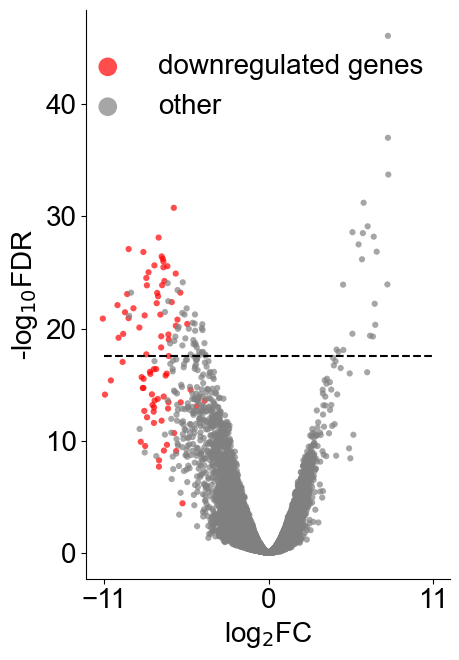

In [19]:
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 20
figure = plt.figure(figsize=(5,7))

LRT_volcano = figure.add_subplot()

colors_dict = {"downregulated genes" : "red", "other" : "grey"}
dots_size=20
transparency=0.7

top_N_cutoff = 100

for feature in colors_dict.keys():
    print(feature)
    current_color = colors_dict[feature]
    
    LRT_volcano.scatter(x=LRTable[LRTable.label == feature]["logFC"].tolist(),
                           y=-np.log10(LRTable[LRTable.label == feature]["PValue.adj"].tolist()),
                           s=dots_size,
                           label=feature,
                           facecolors='none', 
                           edgecolors='none',
                           alpha=transparency,
                           c = current_color)

LRT_volcano.set_xlabel("log$_2$FC")
LRT_volcano.set_ylabel("-log$_{10}$FDR")
#LRT_volcano.set_title("A", size=15, weight='bold', loc='left')

LRT_volcano.spines['top'].set_visible(False)
LRT_volcano.spines['right'].set_visible(False)

hline_y = -np.log10(LRTable.loc[top_N_cutoff-1]["PValue.adj"])
min_x = -round(max(abs(LRTable["logFC"])))
max_x = round(max(abs(LRTable["logFC"])))
LRT_volcano.hlines(y = hline_y, xmin=min_x, xmax=max_x, colors="black", linestyles="dashed", lw=1.5)
LRT_volcano.xaxis.set_ticks([min_x, 0, max_x])


handles, labels = LRT_volcano.get_legend_handles_labels()
figure.legend(handles, labels, 
              loc="upper left", bbox_to_anchor=(0.15,0.93), frameon=False, markerscale=3)

figure.tight_layout()
figure.align_labels()

figure.savefig("Results/Pictures/EcC3000_5_min_downregulated_genes.png", 
               bbox_inches='tight',
               dpi=300)